In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import umap

Data comes from Keren-Shaul et al https://www.cell.com/cell/fulltext/S0092-8674(17)30578-0

In [2]:
annotation = pd.read_csv('/Users/Deathvoodoo/Documents/khodosevich/data/mouse/mouse_alzheimers_annotation_filtered_subtypes.csv')

In [3]:
genes = pd.read_csv('/Users/Deathvoodoo/Documents/khodosevich/data/mouse/genes.txt', names=['genes'])

In [4]:
adata = sc.read_mtx('/Users/Deathvoodoo/Documents/khodosevich/data/mouse/mouse_alzheimers_filtered_cm.mtx')

In [5]:
adata.var_names = genes['genes']
annotation.index = annotation['Well_ID']
adata.obs_names = annotation['Well_ID'].values
adata.obs = annotation

In [6]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

... storing 'Amp_batch_ID' as categorical
... storing 'Mouse_ID' as categorical
... storing 'Batch_desc' as categorical
... storing 'mouse_nr' as categorical
... storing 'condition' as categorical
... storing 'celltype' as categorical


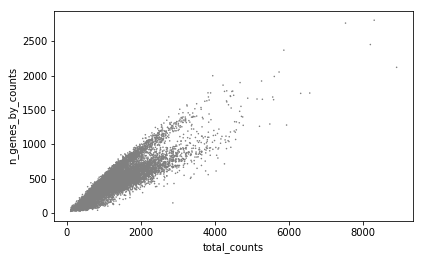

In [7]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [8]:
annotation

,Well_ID,Amp_batch_ID,Mouse_ID,Batch_desc,mouse_nr,condition,celltype,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
Well_ID,,,,,,,,,,,,,,,
W308561,W308561,AB1442,5XFAD,AD6m mouse1 plate#1,AD6m_mouse1,AD,microglia,262,5.572154,688.0,6.535241,66.715116,76.453488,90.988372,100.000000
W308562,W308562,AB1442,5XFAD,AD6m mouse1 plate#1,AD6m_mouse1,AD,microglia,625,6.439350,1383.0,7.232733,38.973247,50.686913,66.015907,90.961678
W308563,W308563,AB1442,5XFAD,AD6m mouse1 plate#1,AD6m_mouse1,AD,microglia,464,6.142037,1068.0,6.974479,47.191011,59.550562,75.280899,100.000000
W308564,W308564,AB1442,5XFAD,AD6m mouse1 plate#1,AD6m_mouse1,AD,microglia,454,6.120297,1009.0,6.917706,49.653122,61.248761,74.826561,100.000000
W308565,W308565,AB1442,5XFAD,AD6m mouse1 plate#1,AD6m_mouse1,AD,microglia,527,6.269096,1083.0,6.988413,42.659280,54.478301,69.806094,97.506925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W627852,W627852,AB2345,C57BL/6,WT6m_mouse3_plate#6,WT6m_mouse3,WT,microglia,159,5.075174,1177.0,7.071573,90.484282,94.987256,100.000000,100.000000
W627853,W627853,AB2345,C57BL/6,WT6m_mouse3_plate#6,WT6m_mouse3,WT,Bcells,782,6.663133,2869.0,7.962067,53.886372,62.460788,73.893343,90.170791
W627854,W627854,AB2345,C57BL/6,WT6m_mouse3_plate#6,WT6m_mouse3,WT,microglia,644,6.469250,2270.0,7.727975,55.814978,65.374449,76.872247,93.656388


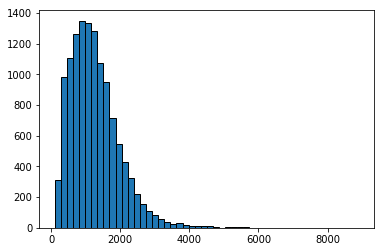

In [9]:
plt.hist(adata.obs['total_counts'].values, bins=50, edgecolor='black')
plt.show()

In [10]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.normalize_total(adata, target_sum=1e3)
sc.pp.log1p(adata)

In [11]:
np.sum(np.exp(adata['W308562'].X)-1) # sanity check

/usr/local/lib/python3.7/site-packages/anndata/core/anndata.py:846: FutureWarning: In anndata v0.7+, arrays contained within an AnnData object will maintain their dimensionality. For example, prior to v0.7 `adata[0, 0].X` returned a scalar and `adata[0, :]` returned a 1d array, post v0.7 they will return two dimensional arrays. If you would like to get a one dimensional array from your AnnData object, consider using the `adata.obs_vector`, `adata.var_vector` methods or accessing the array directly.
  warn_flatten()


1000.00006

In [12]:
sc.pp.highly_variable_genes(adata)

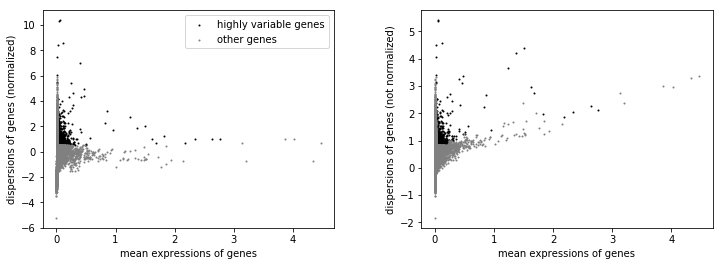

In [13]:
sc.pl.highly_variable_genes(adata)


In [14]:
sc.pp.scale(adata)

In [15]:
sc.tl.pca(adata, svd_solver='randomized')

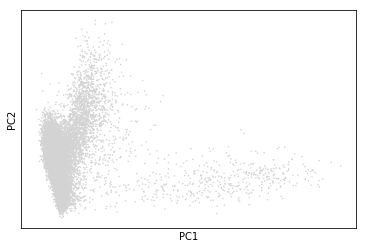

In [16]:
sc.pl.pca(adata)

In [17]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50, metric='correlation')

/usr/local/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../usr/local/lib/python3.7/site-packages/umap/utils.py", line 409:
@numba.njit(parallel=True)
def build_candidates(current_graph, n_vertices, n_neighbors, max_candidates, rng_state):
^

  current_graph, n_vertices, n_neighbors, max_candidates, rng_state
/usr/local/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../usr/local/lib/python3.7/site-packa

In [18]:
sc.tl.umap(adata)

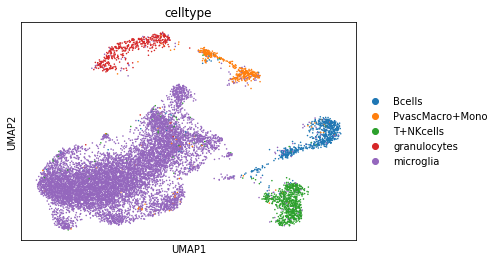

In [19]:
sc.pl.umap(adata, color='celltype')

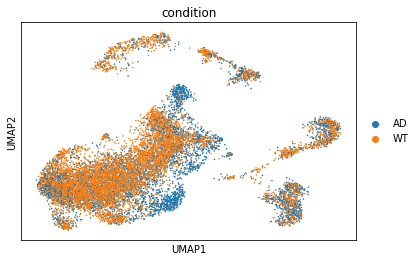

In [20]:
sc.pl.umap(adata, color='condition')

try to do umap of genes?

In [21]:
from sklearn.decomposition import TruncatedSVD
sklearn_svd = TruncatedSVD(n_components = 100)
sklearn_svd.fit(adata.X.T)
genes_pca = sklearn_svd.transform(adata.X.T)
print(genes_pca.shape)

(16678, 100)


In [22]:
reducer = umap.UMAP(n_neighbors=30, min_dist=0.01)
reducer.fit(genes_pca[:, 0:10])

/usr/local/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../usr/local/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/usr/local/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../usr/local/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @num

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.01, n_components=2, n_epochs=None,
     n_neighbors=30, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=False)

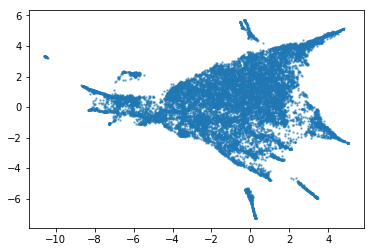

In [23]:
genes_umap = reducer.transform(genes_pca[:, 0:10])
plt.scatter(genes_umap[:, 0], genes_umap[:, 1], s=2, alpha=0.5)
plt.show()

We can briefly try to make the simplest possible autoencoder using pytorch API.

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as functional

In [25]:
rdm_inds = np.random.binomial(1, 0.2, adata.X.shape[0])
train_data = torch.tensor(adata.X[rdm_inds < 1, :])
test_data = torch.tensor(adata.X[rdm_inds > 0, :])

In [26]:
trainloader = torch.utils.data.DataLoader(train_data, batch_size=4,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_data, batch_size=4,
                                         shuffle=False, num_workers=2)

In [27]:
input_dim = adata.X.shape[1]
latent_dim = 10

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.encode = nn.Linear(input_dim, latent_dim)
        self.decode = nn.Linear(latent_dim, input_dim)

    def forward(self, x):
        code = functional.relu(self.encode(x))
        reconstruction = self.decode(code)
        return reconstruction

In [28]:
import torch.optim as optim

net = Net()

criterion = nn.MSELoss()
#optimizer = optim.Adam(net.parameters(), lr=1e-5)
optimizer = optim.SGD(net.parameters(), lr=1e-2)

net.eval()
reconstruction_pre_train = net(test_data)
print(reconstruction_pre_train.shape)
print(test_data.shape)
squared_loss_pre = criterion(reconstruction_pre_train, test_data)
print('pre training reconstruction MSE on test: ', squared_loss_pre.item())

net.train()

prints_per_epoch = 3

verbose_k = np.floor(len(trainloader)/prints_per_epoch)

losses = []
iterations = []

for epoch in range(10):

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        inputs = data
        true_outputs = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        nn_outputs = net(inputs)

        loss = criterion(nn_outputs, true_outputs)
        loss.backward()
        optimizer.step()

        # print statistics, should add validation loss
        running_loss += loss.item()
        
        if (i+1) % verbose_k == 0:   
            losses.append(running_loss/verbose_k)
            true_iter = len(trainloader)*epoch + i
            iterations.append(true_iter)
            
            print('epoch: {}, iteration: {}] loss: {}'.format(epoch, i, running_loss/verbose_k))
            running_loss = 0.0

print('Finished Training')

PATH = '/Users/Deathvoodoo/Documents/random'
torch.save(net.state_dict(), PATH+'/rnaae_params.pth')

torch.Size([2536, 16678])
torch.Size([2536, 16678])
pre training reconstruction MSE on test:  1.0940135717391968
epoch: 0, iteration: 828] loss: 1.0994581584835512
epoch: 0, iteration: 1657] loss: 1.1225622019520427
epoch: 0, iteration: 2486] loss: 1.1396888734635744
epoch: 1, iteration: 828] loss: 1.0484517621476344
epoch: 1, iteration: 1657] loss: 1.071061076315522
epoch: 1, iteration: 2486] loss: 1.0623724049336947
epoch: 2, iteration: 828] loss: 1.0411509104675205
epoch: 2, iteration: 1657] loss: 1.0264422188909552
epoch: 2, iteration: 2486] loss: 1.0354814467225921
epoch: 3, iteration: 828] loss: 1.03438768362395
epoch: 3, iteration: 1657] loss: 1.0241699924802607
epoch: 3, iteration: 2486] loss: 1.0341735742491893
epoch: 4, iteration: 828] loss: 1.023511702174588
epoch: 4, iteration: 1657] loss: 1.032413657813078
epoch: 4, iteration: 2486] loss: 1.0358526337132379
epoch: 5, iteration: 828] loss: 1.021499251643481
epoch: 5, iteration: 1657] loss: 1.0331239278267605
epoch: 5, itera

In [29]:
net.eval()
reconstruction_post = net(test_data)
#print(reconstruction.shape)
#print(test_data.shape)
squared_loss_post = criterion(reconstruction_post, test_data)
print('post train squared loss on test: ', squared_loss_post.item())

post train squared loss on test:  1.120396375656128


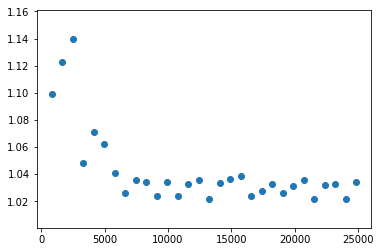

In [30]:
plt.scatter(iterations, losses)
plt.title('average running loss')
plt.show()